In [1]:
!pip install findspark

In [5]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

In [6]:
import findspark

findspark.init("/Users/seneralkan/spark/spark-3.1.2-bin-hadoop3.2")

In [7]:
from pyspark import SparkContext

## Start the Spark App

In [8]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf

In [9]:
spark = SparkSession.builder \
    .master("local") \
    .appName("pyspark_101") \
    .getOrCreate()
    
sc = spark.sparkContext

In [10]:
sc

<SparkContext master=local appName=pyspark_101>

In [11]:
sc.version

'3.1.2'

In [12]:
sc.appName

'pyspark_101'

## Basic DataFrame Processes

Spark Dataframe is diffrent rather than pandas dataframe

Check the examples below !!!

In [14]:
spark_df = spark.read.csv('./churn.csv', header = True, inferSchema=True)

In [15]:
spark_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Churn: integer (nullable = true)



In [16]:
type(spark_df)

pyspark.sql.dataframe.DataFrame

In [18]:
spark_df.cache()

DataFrame[_c0: int, Names: string, Age: double, Total_Purchase: double, Account_Manager: int, Years: double, Num_Sites: double, Churn: int]

In [19]:
import seaborn as sns

df=sns.load_dataset("diamonds")

In [20]:
type(df)

pandas.core.frame.DataFrame

In [21]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [22]:
spark_df.head()

Row(_c0=0, Names='Cameron Williams', Age=42.0, Total_Purchase=11066.8, Account_Manager=0, Years=7.22, Num_Sites=8.0, Churn=1)

In [23]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [24]:
spark_df.dtypes

[('_c0', 'int'),
 ('Names', 'string'),
 ('Age', 'double'),
 ('Total_Purchase', 'double'),
 ('Account_Manager', 'int'),
 ('Years', 'double'),
 ('Num_Sites', 'double'),
 ('Churn', 'int')]

In [25]:
df.ndim

2

In [26]:
spark_df.ndim

AttributeError: 'DataFrame' object has no attribute 'ndim'

In [27]:
sparf_df.show(3, truncate=True)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 3 rows



In [28]:
spark_df.count()

900

In [29]:
spark_df.columns

['_c0',
 'Names',
 'Age',
 'Total_Purchase',
 'Account_Manager',
 'Years',
 'Num_Sites',
 'Churn']

In [30]:
spark_df.describe().show()

+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|               _c0|        Names|              Age|   Total_Purchase|   Account_Manager|            Years|         Num_Sites|              Churn|
+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|          900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5|         null|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916|         null|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|                 0|   Aaron King|             22.0|          

In [31]:
spark_df.describe("Age").show()

+-------+-----------------+
|summary|              Age|
+-------+-----------------+
|  count|              900|
|   mean|41.81666666666667|
| stddev|6.127560416916251|
|    min|             22.0|
|    max|             65.0|
+-------+-----------------+



In [32]:
spark_df.select("Age", "Names").show()

+----+-------------------+
| Age|              Names|
+----+-------------------+
|42.0|   Cameron Williams|
|41.0|      Kevin Mueller|
|38.0|        Eric Lozano|
|42.0|      Phillip White|
|37.0|     Cynthia Norton|
|48.0|   Jessica Williams|
|44.0|        Eric Butler|
|32.0|      Zachary Walsh|
|43.0|        Ashlee Carr|
|40.0|     Jennifer Lynch|
|30.0|       Paula Harris|
|45.0|     Bruce Phillips|
|45.0|       Craig Garner|
|40.0|       Nicole Olson|
|41.0|     Harold Griffin|
|38.0|       James Wright|
|45.0|      Doris Wilkins|
|43.0|Katherine Carpenter|
|53.0|     Lindsay Martin|
|46.0|        Kathy Curry|
+----+-------------------+
only showing top 20 rows



In [33]:
spark_df.filter(spark_df.Age > 40).count()

524

In [34]:
spark_df.groupby("Churn").count().show()

+-----+-----+
|Churn|count|
+-----+-----+
|    1|  150|
|    0|  750|
+-----+-----+



In [35]:
spark_df.groupby("Churn").agg({"Age": "mean"}).show()

+-----+-----------------+
|Churn|         avg(Age)|
+-----+-----------------+
|    1|42.99333333333333|
|    0|41.58133333333333|
+-----+-----------------+



## SQL Usage

In [36]:
spark_df.createOrReplaceTempView("tbl_df")

In [37]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [38]:
spark.sql("show tables").show()

+--------+---------+-----------+
|database|tableName|isTemporary|
+--------+---------+-----------+
|        |   tbl_df|       true|
+--------+---------+-----------+



In [39]:
spark.sql("select Age from tbl_df").show()

+----+
| Age|
+----+
|42.0|
|41.0|
|38.0|
|42.0|
|37.0|
|48.0|
|44.0|
|32.0|
|43.0|
|40.0|
|30.0|
|45.0|
|45.0|
|40.0|
|41.0|
|38.0|
|45.0|
|43.0|
|53.0|
|46.0|
+----+
only showing top 20 rows



In [40]:
spark.sql("select Churn, mean(Age) from tbl_df group by Churn").show()

+-----+-----------------+
|Churn|        mean(Age)|
+-----+-----------------+
|    1|42.99333333333333|
|    0|41.58133333333333|
+-----+-----------------+



In [41]:
## Visualization Big Data
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Churn'>

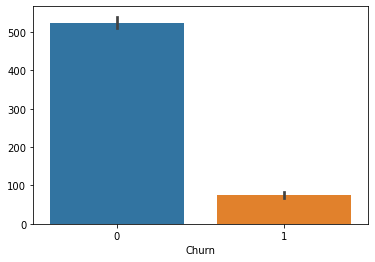

In [43]:
## First, we need to reduce the spark df to pandas df
sdf=spark_df.toPandas()
sns.barplot(x="Churn", y=sdf.Churn.index, data=sdf)

## Machine Learning Practice

In [44]:
spark_df.show()

+---+-------------------+----+--------------+---------------+-----+---------+-----+
|_c0|              Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+-------------------+----+--------------+---------------+-----+---------+-----+
|  0|   Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|      Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|        Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|      Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|     Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
|  5|   Jessica Williams|48.0|      10356.02|              0| 5.12|      8.0|    1|
|  6|        Eric Butler|44.0|      11331.58|              1| 5.23|     11.0|    1|
|  7|      Zachary Walsh|32.0|       9885.12|              1| 6.92|      9.0|    1|
|  8|        Ashlee Carr|43.0|       14062.6|              1| 5.46|     11.0

In [45]:
spark_df = spark_df.toDF(*[c.lower() for c in spark_df.columns])

In [47]:
spark_df.show()

+---+-------------------+----+--------------+---------------+-----+---------+-----+
|_c0|              names| age|total_purchase|account_manager|years|num_sites|churn|
+---+-------------------+----+--------------+---------------+-----+---------+-----+
|  0|   Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|      Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|        Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|      Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|     Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
|  5|   Jessica Williams|48.0|      10356.02|              0| 5.12|      8.0|    1|
|  6|        Eric Butler|44.0|      11331.58|              1| 5.23|     11.0|    1|
|  7|      Zachary Walsh|32.0|       9885.12|              1| 6.92|      9.0|    1|
|  8|        Ashlee Carr|43.0|       14062.6|              1| 5.46|     11.0

In [48]:
# Changing the columns name
spark_df = spark_df.withColumnRenamed("_c0", "index")

In [49]:
spark_df.count()

900

In [50]:
spark_df.columns

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn']

In [56]:
spark_df.describe().show()

+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|             index|        names|              age|   total_purchase|   account_manager|            years|         num_sites|              churn|
+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|          900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5|         null|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916|         null|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|                 0|   Aaron King|             22.0|          

In [57]:
spark_df.select("age", "total_purchase", "account_manager", "churn").describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,900,41.81666666666667,6.127560416916251,22.0,65.0
total_purchase,900,10062.82403333334,2408.644531858096,100.0,18026.01
account_manager,900,0.4811111111111111,0.4999208935073339,0,1
churn,900,0.16666666666666666,0.3728852122772358,0,1


In [58]:
## Pre-processing
# Drop missing values
spark_df = spark_df.dropna()

In [60]:
spark_df = spark_df.withColumn("age^2", spark_df.age **2)
spark_df.show()

+-----+-------------------+----+--------------+---------------+-----+---------+-----+------+------+
|index|              names| age|total_purchase|account_manager|years|num_sites|churn| age_2| age^2|
+-----+-------------------+----+--------------+---------------+-----+---------+-----+------+------+
|    0|   Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|1764.0|1764.0|
|    1|      Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|1681.0|1681.0|
|    2|        Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|1444.0|1444.0|
|    3|      Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|1764.0|1764.0|
|    4|     Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|1369.0|1369.0|
|    5|   Jessica Williams|48.0|      10356.02|              0| 5.12|      8.0|    1|2304.0|2304.0|
|    6|        Eric Butler|44.0|      11331.58|              1| 5.23|     11.0|    1|1936.0|1936.0|


In [63]:
# Determining the dependent variable
from pyspark.ml.feature import StringIndexer
# We need to assign the churn column as label for ml processes
stringIndexer = StringIndexer(inputCol ="churn", outputCol="label")

In [64]:
model = stringIndexer.fit(spark_df)
indexed = model.transform(spark_df)

# Changing the label data type to integer
spark_df =indexed.withColumn("label", indexed["label"].cast("integer"))
spark_df.show()

IllegalArgumentException: requirement failed: Output column label already exists.

In [65]:
# Determining independent variable
independent_var =["age", "total_purchase", "account_manager", "years", "num_sites"]

In [66]:
from pyspark.ml.feature import VectorAssembler

vectorAssembler = VectorAssembler(inputCols=independent_var, outputCol="features")

feature_df = vectorAssembler.transform(spark_df)

In [69]:
final_df = feature_df.select(["features", "label"])

In [70]:
final_df.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[42.0,11066.8,0.0...|    1|
|[41.0,11916.22,0....|    1|
|[38.0,12884.75,0....|    1|
|[42.0,8010.76,0.0...|    1|
|[37.0,9191.58,0.0...|    1|
|[48.0,10356.02,0....|    1|
|[44.0,11331.58,1....|    1|
|[32.0,9885.12,1.0...|    1|
|[43.0,14062.6,1.0...|    1|
|[40.0,8066.94,1.0...|    1|
|[30.0,11575.37,1....|    1|
|[45.0,8771.02,1.0...|    1|
|[45.0,8988.67,1.0...|    1|
|[40.0,8283.32,1.0...|    1|
|[41.0,6569.87,1.0...|    1|
|[38.0,10494.82,1....|    1|
|[45.0,8213.41,1.0...|    1|
|[43.0,11226.88,0....|    1|
|[53.0,5515.09,0.0...|    1|
|[46.0,8046.4,1.0,...|    1|
+--------------------+-----+
only showing top 20 rows



In [71]:
# Train-test
splits =final_df.randomSplit([0.70, 0.30])
train_df = splits[0]
test_df = splits[1]

### Churn Analysis - ML Modelling

Gradient-Boosted Trees (GBTs) is a learning algorithm for classification. It supports binary labels, as well as both continuous and categorical features. Note: Multiclass labels are not currently supported.

In [72]:
from pyspark.ml.classification import GBTClassifier

In [73]:
gbm = GBTClassifier(maxIter=10, featuresCol= "features", labelCol= "label")

In [75]:
# Fitting the model
gbm_model = gbm.fit(train_df)

In [76]:
y_pred = gbm_model.transform(test_df)

In [77]:
y_pred.show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[22.0,11254.38,1....|    0|[0.81944759801368...|[0.83738455049384...|       0.0|
|[26.0,8939.61,0.0...|    0|[1.37441121280323...|[0.93984681038467...|       0.0|
|[27.0,8628.8,1.0,...|    0|[1.02273454096283...|[0.88548899344856...|       0.0|
|[28.0,9090.43,1.0...|    0|[-1.1182760211156...|[0.09651578731992...|       1.0|
|[29.0,9378.24,0.0...|    0|[1.37106532333162...|[0.93946737671853...|       0.0|
|[29.0,13240.01,1....|    0|[0.39667442031882...|[0.68854993891737...|       0.0|
|[29.0,13255.05,1....|    0|[0.17110630862498...|[0.58472789379771...|       0.0|
|[30.0,8403.78,1.0...|    0|[1.09339557061350...|[0.89905706407921...|       0.0|
|[30.0,8677.28,1.0...|    0|[1.06474025359877...|[0.89373568103414...|       0.0|
|[30.0,12788.37,

In [78]:
ac = y_pred.select("label", "prediction")

In [79]:
## Accuracy
ac.filter(ac.label == ac.prediction).count()/ac.count()

0.8587360594795539

#### Model Tuning

In [80]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

evaluator = BinaryClassificationEvaluator()

paramGrid = (ParamGridBuilder()
             .addGrid(gbm.maxDepth, [2, 4, 6])
             .addGrid(gbm.maxBins, [20, 30])
             .addGrid(gbm.maxIter, [10, 20])
             .build())

cv = CrossValidator(estimator=gbm, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=10)

In [81]:
# Fitting the model
cvModel = cv.fit(train_df)

In [82]:
y_pred = cvModel.transform(test_df)

In [83]:
ac = y_pred.select("label", "prediction")

In [84]:
ac.filter(ac.label==ac.prediction).count()/ac.count()

0.8773234200743495

In [85]:
## We have increased the the accuracy of the model by using model tuning

#### Let's check the new customers will churn or not ??

In [87]:
import pandas as pd

names = pd.Series(["Ali Ahmetoğlu", "Taner Gün", "Berkay Ozen","Polat Konak", "Kamil Atasoy"])
age = pd.Series([38, 43, 34, 50, 40])
total_purchase = pd.Series([30000, 10000, 6000, 30000, 100000])
account_manager = pd.Series([1,0,0,1,1])
years = pd.Series([20, 10, 3, 8, 30])
num_sites = pd.Series([30,8,8,6,50])


new_customer = pd.DataFrame({
    'names':names,
    'age': age,
    'total_purchase': total_purchase,
    'account_manager': account_manager ,
    'years': years,
    'num_sites': num_sites})

new_customer.columns

Index(['names', 'age', 'total_purchase', 'account_manager', 'years',
       'num_sites'],
      dtype='object')

In [88]:
# Creating the spark dataframe to predict ml results
new_sdf = spark.createDataFrame(new_customer)

In [89]:
new_sdf.show()

+-------------+---+--------------+---------------+-----+---------+
|        names|age|total_purchase|account_manager|years|num_sites|
+-------------+---+--------------+---------------+-----+---------+
|Ali Ahmetoğlu| 38|         30000|              1|   20|       30|
|    Taner Gün| 43|         10000|              0|   10|        8|
|  Berkay Ozen| 34|          6000|              0|    3|        8|
|  Polat Konak| 50|         30000|              1|    8|        6|
| Kamil Atasoy| 40|        100000|              1|   30|       50|
+-------------+---+--------------+---------------+-----+---------+



In [90]:
# We need the transform the data for the understanding of the ml model
new_customers = vectorAssembler.transform(new_sdf)

In [91]:
results = cvModel.transform(new_customers)

In [92]:
results.select("names", "prediction").show()

+-------------+----------+
|        names|prediction|
+-------------+----------+
|Ali Ahmetoğlu|       1.0|
|    Taner Gün|       0.0|
|  Berkay Ozen|       0.0|
|  Polat Konak|       0.0|
| Kamil Atasoy|       1.0|
+-------------+----------+



In [93]:
sc.stop()